In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

In [2]:
fft?

We are going to illustrate the power of the Discrete Fourier Transform by using it for a filtering procedure, i.e. we are going to take data with noise and try to recover the underlying signal.

We will have a function of the form

$$ f(x) = \sin(x) + \text{(noise)}$$

and we will try to remove the noise. 

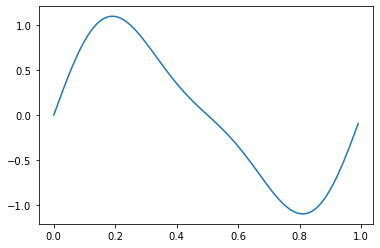

In [15]:
x = np.arange(0,1,0.01)
f = np.sin(2*np.pi*x) + (0.25)*np.sin(4*np.pi*x)
plt.plot(x,f)

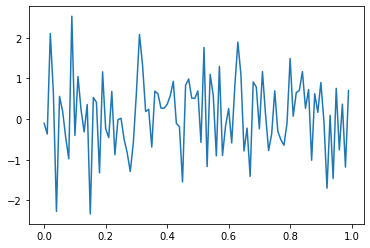

In [16]:
# Now we add noise

noise = np.random.normal(size =len(x))
plt.plot(x,noise)

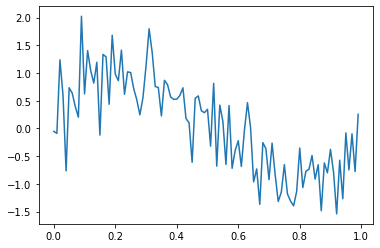

In [17]:
epsilon = 0.5
f_noisy = f + epsilon*noise
plt.plot(x,f_noisy)

/opt/anaconda3/envs/LinOpt/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


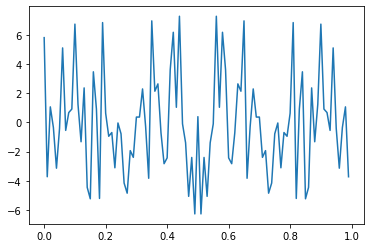

In [22]:
f_noisy_hat = fft.fft(f_noisy)
plt.plot(x,f_noisy_hat)

In [34]:
tolerance = max(abs(f_noisy_hat))
for k in range(len(f)):
    if abs(f_noisy_hat[k]) < (0.05)*tolerance:
        f_noisy_hat[k] = 0
        
f_recovered = fft.ifft(f_noisy_hat)


/opt/anaconda3/envs/LinOpt/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


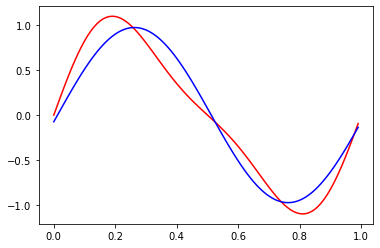

In [35]:
plt.plot(x,f,color='red')
plt.plot(x,f_recovered,color='blue')